In [1]:
import matplotlib.pyplot as plt
import numpy as np
from data.alphadigits import BinaryAlphaDigitsDataset
from torch.utils.data import DataLoader

In [2]:
restrict_labels = ['a', 'b', 'c', 'd']

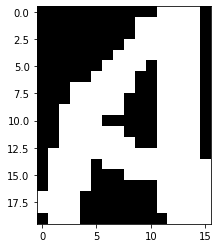

In [3]:
plt.imshow(BinaryAlphaDigitsDataset(restrict_labels=restrict_labels).data[1],
           cmap='gray')
plt.show()

## RBM

In [4]:
from principal_RBM_alpha import init_RBM, train_RBM, generer_image_RBM

Epoch 1 - Reconstruction error: 0.20569565045432098
Epoch 101 - Reconstruction error: 0.008694810353870736
Epoch 201 - Reconstruction error: 0.0027950820085684766
Epoch 301 - Reconstruction error: 0.0012665751446127005
Epoch 401 - Reconstruction error: 0.0008171661805603007
Epoch 501 - Reconstruction error: 0.0004139519741723442
Epoch 601 - Reconstruction error: 0.00032399759158163835
Epoch 701 - Reconstruction error: 0.0002955666194321035
Epoch 801 - Reconstruction error: 0.0001609043553642561
Epoch 901 - Reconstruction error: 0.00016956545997875443
Epoch 1001 - Reconstruction error: 0.00016777569403875482


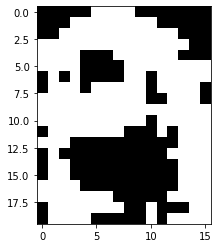

In [5]:
rbm = init_RBM(320, 100)
rbm = train_RBM(rbm, epochs=1001,
                ds=BinaryAlphaDigitsDataset(restrict_labels=restrict_labels))
generer_image_RBM(rbm, num_iterations=500, num_images=1)

## DBN

Training RBM 1
Epoch 1 - Reconstruction error: 0.22675140097947497
Epoch 101 - Reconstruction error: 0.06700954748112542
Epoch 201 - Reconstruction error: 0.0391343324503948
Epoch 301 - Reconstruction error: 0.027058756180016186
Epoch 401 - Reconstruction error: 0.0190925005345416
Epoch 501 - Reconstruction error: 0.014437407524786337
Epoch 601 - Reconstruction error: 0.011426736008691499
Epoch 701 - Reconstruction error: 0.008748762615573655
Epoch 801 - Reconstruction error: 0.007100374058754581
Epoch 901 - Reconstruction error: 0.00583682413670717
Training RBM 2
Epoch 1 - Reconstruction error: 0.22923097576012072
Epoch 101 - Reconstruction error: 0.0859522648207736
Epoch 201 - Reconstruction error: 0.06024156618652472
Epoch 301 - Reconstruction error: 0.04818330581644269
Epoch 401 - Reconstruction error: 0.03995776243236017
Epoch 501 - Reconstruction error: 0.031116637265825985
Epoch 601 - Reconstruction error: 0.027822548295714473
Epoch 701 - Reconstruction error: 0.0256381041293955

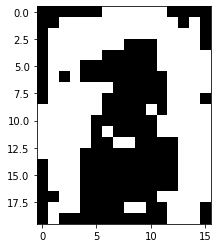

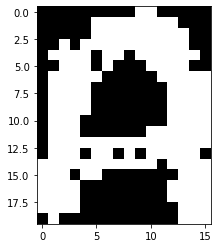

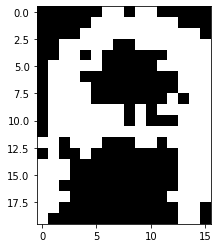

In [6]:
from principal_DBN_alpha import init_DBN, train_DBN, generer_image_DBN

dbn = init_DBN([320, 100, 50])
dbn = train_DBN(dbn, 1000, 1e-1, 32, 
                ds=BinaryAlphaDigitsDataset(restrict_labels=['a', 'b', 'c', 'd'],
                                            mode='train'))
generer_image_DBN(dbn, 301, 3)

# DNN

In [7]:
from principal_DNN_alpha import init_DNN, entree_sortie_reseau, pretrain_DNN, retropropagation

In [8]:
dnn = init_DNN([320, 200, 100, 50, len(restrict_labels)])
dnn = pretrain_DNN(dnn, 501, 1e-1, 32,
                   ds=BinaryAlphaDigitsDataset(restrict_labels=restrict_labels))

Training RBM 1
Epoch 1 - Reconstruction error: 0.22414817959072122
Epoch 101 - Reconstruction error: 0.04129012723699721
Epoch 201 - Reconstruction error: 0.015286034701822094
Epoch 301 - Reconstruction error: 0.007140960306501955
Epoch 401 - Reconstruction error: 0.0037188795581938245
Epoch 501 - Reconstruction error: 0.0022733433165005716
Training RBM 2
Epoch 1 - Reconstruction error: 0.21636119248555782
Epoch 101 - Reconstruction error: 0.05166100310445006
Epoch 201 - Reconstruction error: 0.028678186581448772
Epoch 301 - Reconstruction error: 0.017906008069082494
Epoch 401 - Reconstruction error: 0.012516751743721383
Epoch 501 - Reconstruction error: 0.009149564062074195
Training RBM 3
Epoch 1 - Reconstruction error: 0.23158820497527882
Epoch 101 - Reconstruction error: 0.07578617454447441
Epoch 201 - Reconstruction error: 0.05053175356767803
Epoch 301 - Reconstruction error: 0.03988872382906171
Epoch 401 - Reconstruction error: 0.032671179731843907
Epoch 501 - Reconstruction error

In [9]:
dnn = retropropagation(dnn, 501, 5e-4, 8,
                       ds=BinaryAlphaDigitsDataset(restrict_labels=restrict_labels))

Epoch 1 - Loss: 1.3865153290558159
Epoch 21 - Loss: 1.3465866220857985
Epoch 41 - Loss: 1.3101124503437833
Epoch 61 - Loss: 1.2761263329590347
Epoch 81 - Loss: 1.2461868844847135
Epoch 101 - Loss: 1.22024868287236
Epoch 121 - Loss: 1.1953165907188328
Epoch 141 - Loss: 1.1728425720843005
Epoch 161 - Loss: 1.1538187938067412
Epoch 181 - Loss: 1.1386421038074162
Epoch 201 - Loss: 1.1215519552536162
Epoch 221 - Loss: 1.1045772321507246
Epoch 241 - Loss: 1.0902357111075358
Epoch 261 - Loss: 1.079623504075331
Epoch 281 - Loss: 1.066032457767845
Epoch 301 - Loss: 1.0552460933592076
Epoch 321 - Loss: 1.0451400400067634
Epoch 341 - Loss: 1.0341814008973835
Epoch 361 - Loss: 1.0290628262234076
Epoch 381 - Loss: 1.016832589132633
Epoch 401 - Loss: 1.0107378386345176
Epoch 421 - Loss: 1.0045778380028005
Epoch 441 - Loss: 1.0008467997923687
Epoch 461 - Loss: 0.9937232433581903
Epoch 481 - Loss: 0.9850524526709629
Epoch 501 - Loss: 0.9821204382730178


In [10]:
def test_DNN(dnn, ds):
    data = ds.data
    data = data.reshape((data.shape[0], -1))
    labels = ds.labels
    logits = entree_sortie_reseau(dnn, data)[-1]
    predictions = np.argmax(logits, axis=1)
    error_rate = np.mean(predictions != labels)
    return error_rate

In [11]:
error_rate = test_DNN(dnn, BinaryAlphaDigitsDataset(restrict_labels=restrict_labels))
print(f"Error rate: {error_rate*100:.2f}%")

Error rate: 6.41%
